## Optimal coordinate system for ODE: second example

Nonlinear ODE: Gompertz equation. Explicit Euler method.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [72]:
a = 3
b = 0.5

In [73]:
def f(y): 
    return y * (a - b * math.log(y))

In [74]:
def fbar(ybar): 
    return 1

In [75]:
def psi(y):
    return -1/b * np.log((a-b*np.log(y))/(a-b*np.log(y0)))

def psi_inv(ybar):
    return np.exp( (np.exp(-b * ybar) * (a * (-1 + np.exp(b*ybar)) + b * np.log(y0)))/b)

In [76]:
y0 = 1
ybar0 = psi(y0)

In [77]:
J = 10
h = 0.9

In [78]:
tj = h * np.array(range(J+1))

In [79]:
yj = np.zeros(J+1) * np.nan
yj[0] = y0

for j in range(J):
    yj[j+1] = yj[j] + h * f(yj[j])

In [80]:
ybarj = np.zeros(J+1) * np.nan
ybarj[0] = ybar0

for j in range(J):
    ybarj[j+1] = ybarj[j] + h * fbar(ybarj[j])

In [81]:
ybarunbarj = psi_inv(ybarj)

In [82]:
tplot = np.linspace(tj[0], tj[-1], 1000)
yexact = np.exp((a-a*np.exp(-b*tplot))/b)

In [83]:
font_size = 8
smaller_font_size = 0.8*font_size

mm_to_in = 0.03937

cbfyellow = (240/255, 228/255, 66/255)
cbforange = (230/255, 159/255, 0/255)
cbfred = (213/255, 94/255, 0/255)
cbfmagenta = (204/255, 121/255, 167/255)
cbflightblue = (86/255, 180/255, 233/255)
cbfblue = (0/255, 114/255, 178/255)
cbfgreen = (0/255, 158/255, 115/255)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": font_size,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.constrained_layout.use": True 
    }
)
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage[utf8]{inputenc}')

In [84]:
s=30

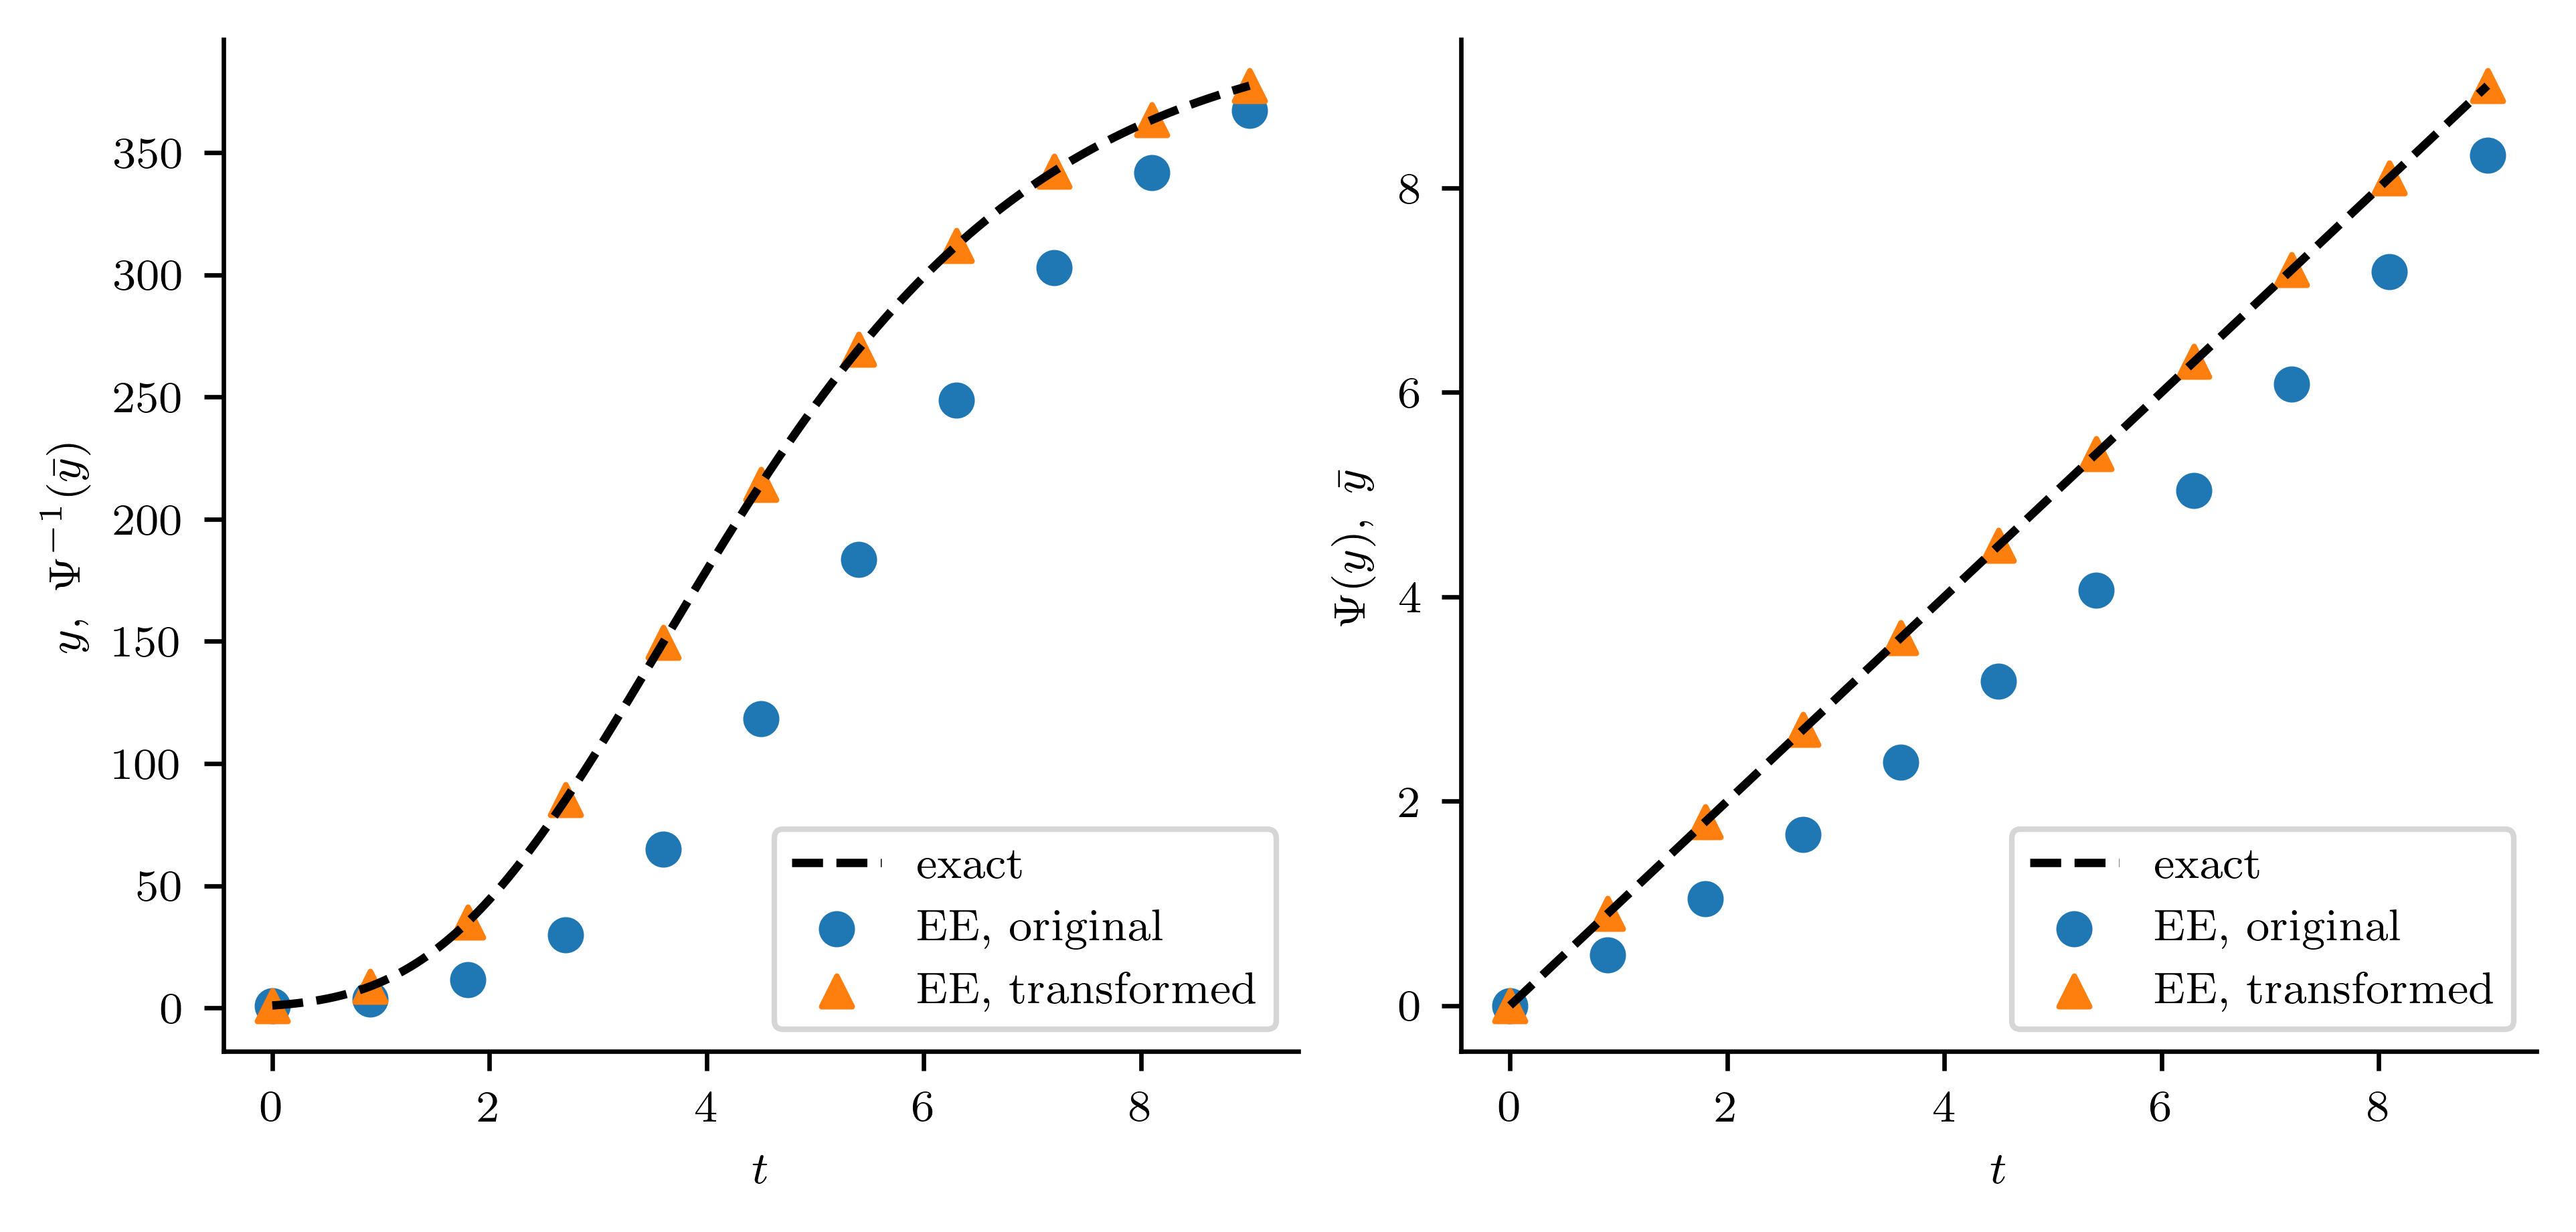

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(160*mm_to_in,75*mm_to_in), dpi=600)

ax[0].plot(tplot, yexact, label='exact', c='k', ls='--')

ax[0].scatter(tj, yj, label='EE, original', s=s)
ax[0].scatter(tj, ybarunbarj, label='EE, transformed', s=s, marker='^')

ax[0].set_xlabel(r'$$t$$')
ax[0].set_ylabel(r'$$y,\,\, \Psi^{-1}(\bar{y})$$')

# ax[0].set_xlim([0,5])
# ax[0].set_ylim([0,1.1])

ax[0].set_axisbelow(True)

ax[0].legend(loc='lower right')


###

ax[1].plot(tplot, psi(yexact), label='exact', c='k', ls='--')

ax[1].scatter(tj, psi(yj), label='EE, original', s=s)
ax[1].scatter(tj, ybarj, label='EE, transformed', s=s, marker='^')

ax[1].set_xlabel(r'$$t$$')
ax[1].set_ylabel(r'$$\Psi(y),\,\, \bar{y}$$')

ax[1].legend(loc='lower right')

plt.savefig('optimal_coords_EE_gompertz.png', facecolor='w', bbox_inches='tight')

plt.show()